code used to create a directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

get the below api command key from kaggle datasets

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
# commands used to unzip the file

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#  using generators so that data is loaded in small batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalizing the data
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label # this function is taking every image one by one and normalizing it .

# down here we are saving the image in the same folder

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
# creating a cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,001 (56.61 MB)

 Trainable params: 14,839,553 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.5840 - loss: 2.4316 - val_accuracy: 0.5054 - val_loss: 1.0021
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6598 - loss: 0.6195 - val_accuracy: 0.7648 - val_loss: 0.4983
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7497 - loss: 0.4756 - val_accuracy: 0.7842 - val_loss: 0.4419
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7696 - loss: 0.4435 - val_accuracy: 0.7728 - val_loss: 0.4710
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7985 - loss: 0.3823 - val_accuracy: 0.8060 - val_loss: 0.4795
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8450 - loss: 0.3183 - val_accuracy: 0.7606 - val_loss: 0.6817
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8612 - loss: 0.2792 - val_accuracy: 0.8148 - val_loss: 0.5346
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8845 - loss: 0.2292 - 

#predicting the model with new image from internet

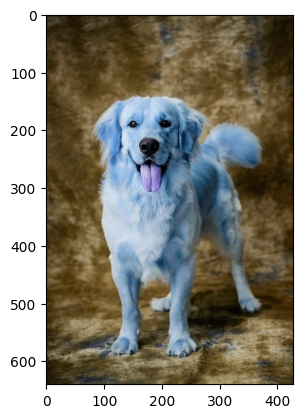

In [ ]:
import matplotlib.pyplot as plt
import cv2
test_img_dog=cv2.imread('/content/dog.webp')
plt.imshow(test_img_dog)

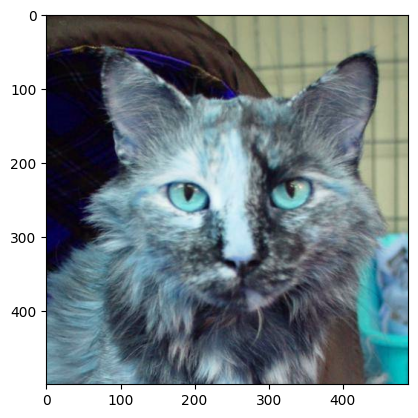

In [ ]:
test_img_cat=cv2.imread('/content/dogs_vs_cats/test/cats/cat.10.jpg')
plt.imshow(test_img_cat)

In [ ]:
test_img_cat.shape

(499, 489, 3)

In [ ]:
test_img_dog.shape


(640, 427, 3)

In [ ]:
test_img_dog=cv2.resize(test_img_dog,(256,256))

In [ ]:
test_img_cat=cv2.resize(test_img_cat,(256,256))

In [ ]:
test_input_cat=test_img_cat.reshape((1,256,256,3))
# as we know we pass the data in batches but here we have only 1 image so we are converting it intto 4d tensor
test_input_dog=test_img_dog.reshape((1,256,256,3))

In [ ]:
prediction=model.predict(test_input_dog)
print(prediction)# 1 means dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.]]


In [ ]:
prediction2=model.predict(test_input_cat)
print(prediction2)# 0 means cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.5577832]]


# FGSM Attack


In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
def fgsm_attack(model, image, label, epsilon):
    # Convert the image and label to tensors
    image = tf.convert_to_tensor(image)
    label = tf.convert_to_tensor(label)

    # Using a tf.GradientTape to record the operations used to compute the gradients
    with tf.GradientTape() as tape:
        tape.watch(image)  # Mark the image as a watchable tensor
        prediction = model(image)
        loss = tf.keras.losses.binary_crossentropy(label, prediction)

    # Get the gradients of the loss with respect to the image
    gradient = tape.gradient(loss, image)

    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)

    # Create the adversarial example by adding the perturbation
    adversarial_image = image + epsilon * signed_grad

    # Clip the adversarial image to ensure it's still in the valid range
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

    return adversarial_image


In [ ]:
label = tf.constant([[1]], dtype=tf.float32)
# Inspect the gradients
with tf.GradientTape() as tape:
    tape.watch(test_input_dog)
    prediction = model(test_input_dog)
    loss = tf.keras.losses.binary_crossentropy(label, prediction)

# Calculate gradients
gradient = tape.gradient(loss, test_input_dog)

# Convert gradient to numpy and inspect
gradient_np = gradient.numpy().squeeze()
print("Gradient Min:", gradient_np.min())
print("Gradient Max:", gradient_np.max())
print("Gradient Mean:", gradient_np.mean())


Gradient Min: 0.0
Gradient Max: 0.0
Gradient Mean: 0.0


In [ ]:
# Get the model's prediction on the original image
prediction = model(test_input_dog)
print("Model Prediction:", prediction.numpy())

# Calculate the loss manually
loss = tf.keras.losses.binary_crossentropy(label, prediction)
print("Loss:", loss.numpy())


Model Prediction: [[1.]]
Loss: [0.]


In [ ]:
# Assuming 'test_input_dog' is the image tensor of a dog and has been reshaped correctly
epsilon = 0.1  # Small perturbation

# Ensure the input image is of type float32
test_input_dog = tf.cast(test_input_dog, tf.float32)

# Define the label with the correct shape and type
label = tf.constant([[1]], dtype=tf.float32)

# Create an adversarial example
adv_dog_image = fgsm_attack(model, test_input_dog, label=label, epsilon=epsilon)

# Predict the class of the adversarial image
adv_prediction = model.predict(adv_dog_image)

print("Adversarial Prediction (1 means dog, 0 means cat):", adv_prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Adversarial Prediction (1 means dog, 0 means cat): [[0.00364006]]


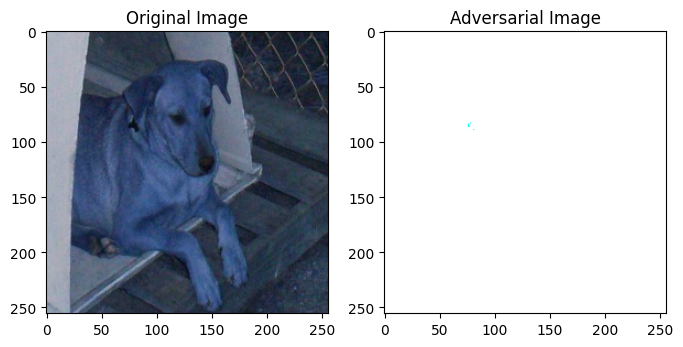

In [ ]:
import matplotlib.pyplot as plt


# Convert tensors to numpy arrays for visualization
original_image = test_input_dog.numpy().squeeze()
adversarial_image_np = adv_dog_image.numpy().squeeze()
# Normalize the original image to [0, 1] range
original_image_np = original_image / 255.0
 # Assuming the original image was in [0, 255] range

# Plot the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image_np)

plt.subplot(1, 2, 2)
plt.title("Adversarial Image")
plt.imshow(adversarial_image_np)

plt.show()


In [ ]:
print("Original Image Shape:", original_image_np.shape)
print("Adversarial Image Shape:", adversarial_image_np.shape)

print("Original Image Range:", original_image_np.min(), "-", original_image_np.max())
print("Adversarial Image Range:", adversarial_image_np.min(), "-", adversarial_image_np.max())


Original Image Shape: (256, 256, 3)
Adversarial Image Shape: (256, 256, 3)
Original Image Range: 0.0 - 0.827451
Adversarial Image Range: 0.0 - 1.0


In [ ]:
# Print the min, max, and mean values of the adversarial image
print("Adversarial Image Min:", adversarial_image_np.min())
print("Adversarial Image Max:", adversarial_image_np.max())
print("Adversarial Image Mean:", adversarial_image_np.mean())


Adversarial Image Min: 0.0
Adversarial Image Max: 1.0
Adversarial Image Mean: 0.9999695
